In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Training dataset/classification_train.csv')
X=((data.iloc[0:24000,1:785].values).T)/255
Y=data.iloc[:,0].values
X_t=((data.iloc[24000:30000,1:785].values).T)/255
Y2=data.iloc[0:24000,0].values
# one hot encoding

Y1=np.zeros((30000,10))
for j in range(10):
  for i in range(30000):
    if (Y[i]==j):
      Y1[i,j]=1
#now, Y1 is the target values for n neural network

#splitting the target values
y=(Y1[0:24000,:]).T
y_t=(Y1[24000:30000,:]).T
label=(data.iloc[24000:30000,0].values).reshape(6000,1)

In [ ]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
    
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [ ]:
def parameter(p, n, q):
    w1 = np.random.randn(n, p)*0.01
    b1 = np.zeros((n, 1))
    
    w2 = np.random.randn(q, n)*0.01
    b2 = np.zeros((q, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [ ]:
def forward_prop(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_func = {
        "z1" : z1,
        "a1" : a1,+
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_func

In [ ]:
def cost(a2, y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

In [ ]:
def backward_prop(x, y, parameters, forward_func):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_func['a1']
    a2 = forward_func['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    grads={
        "dw1" : dw1,
        "dw2" : dw2,
        "db1" : db1,
        "db2" : db2,
        "dz1" : dz1,
        "dz2" : dz2
    }

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [ ]:
def model(x, y, n, learning_rate, iterations):
    
    p = x.shape[0]
    q = y.shape[0]
    
    cost_list = []
    
    parameters = parameter(p, n, q)
    
    for i in range(iterations):
        
        forward_func = forward_prop(x, parameters)
        cost_cal = cost(forward_func['a2'], y)
        cost_list.append(cost_cal)
        grads = backward_prop(x, y, parameters, forward_func)
        parameters=update_parameters(parameters, grads, learning_rate)
        #if(i%10 == 0):
        print("Cost after", i, "iterations is :", cost_cal)
        
    return parameters, cost_list

In [ ]:
iterations = 1201
n = 784
learning_rate = 0.8
Parameters, Cost_list = model(X, y, n, learning_rate,iterations)

Cost after 0 iterations is : 2.300694144347545
Cost after 1 iterations is : 2.2399569402001647
Cost after 2 iterations is : 2.187838438852475
Cost after 3 iterations is : 2.1397885454980994
Cost after 4 iterations is : 2.0944018608740853
Cost after 5 iterations is : 2.051175614081319
Cost after 6 iterations is : 2.009887933895978
Cost after 7 iterations is : 1.9704108951837602
Cost after 8 iterations is : 1.9326504535785063
Cost after 9 iterations is : 1.896525820609935
Cost after 10 iterations is : 1.8619620504849463
Cost after 11 iterations is : 1.828887377198181
Cost after 12 iterations is : 1.797232345522997
Cost after 13 iterations is : 1.7669296233312568
Cost after 14 iterations is : 1.7379140555112254
Cost after 15 iterations is : 1.710122781623694
Cost after 16 iterations is : 1.6834953484320363
Cost after 17 iterations is : 1.6579737900845983
Cost after 18 iterations is : 1.6335026737514138
Cost after 19 iterations is : 1.6100291098146804
Cost after 20 iterations is : 1.587502

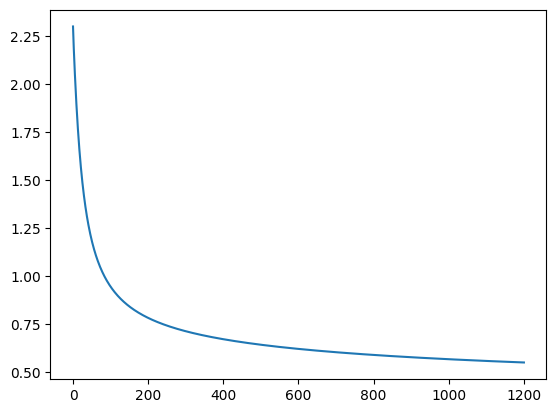

In [ ]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [ ]:
w1 = Parameters['w1']
b1 = Parameters['b1']
w2 = Parameters['w2']
b2 = Parameters['b2']

z1 = np.dot(w1, X_t) + b1
a1 = relu(z1)
    
z2 = np.dot(w2, a1) + b2
a2 = softmax(z2)

acc=0
a=np.random.rand(6000)
for i in range(6000):
  a[i]=np.argmax(a2[:,i])
a=a.reshape(6000,1)
for i in range(6000):
  if(label[i]==a[i]):
    acc+=1
print(round((acc/60),3))

81.55
